# Test the streaming operator
This notebook lets you test the streaming operator in 2d.
It supports streaming in one direction only. Use the param `streaming_direction` to set the value as wished.

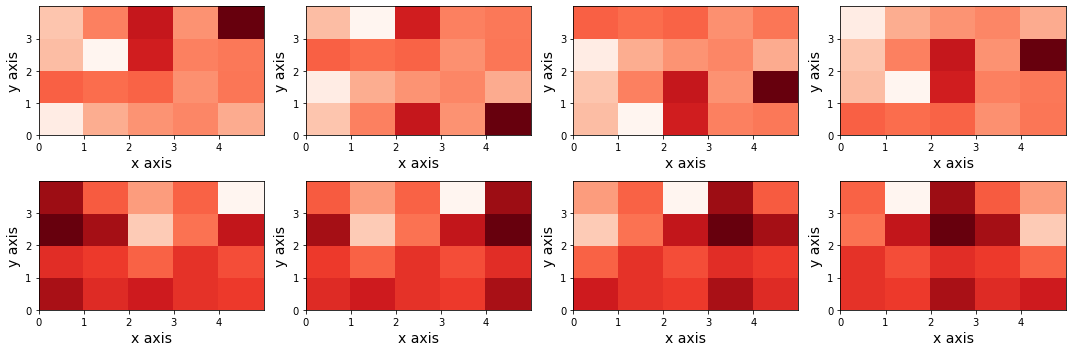

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from pylbm import lbm

streaming_directions = [2,3]
epochs = 4

eps = 0.01
r_mean, u_mean = 0.5, 0.5
x_dim, y_dim = 5, 4
r_ij = lbm.density_init(x_dim=x_dim, y_dim=y_dim, r_mean=r_mean, eps=eps)
u_aij = lbm.local_avg_velocity_init(x_dim=x_dim, y_dim=y_dim, u_mean=u_mean, eps=eps)
f_ijc = lbm.f_eq(u_axy=u_aij, r_xy=r_ij)

font_size = 14
plt.rc('axes', titlesize=font_size)
plt.rc('axes', labelsize=font_size)
fig, ax = plt.subplots(figsize=(15,5))
plt.axis('off')
axs = fig.subplots(nrows=2, ncols=epochs)

for e in range(epochs):
    for i, dir in enumerate( streaming_directions):
        ax = axs[i,e]
        ax.grid(False)
        ax.set_xticks(np.arange(x_dim))
        ax.set_yticks(np.arange(y_dim).T)
        ax.set_xlabel("x axis")
        ax.set_ylabel("y axis")
        data = f_ijc[dir, :, :].T
        ax.pcolor(data, cmap=plt.cm.Reds)
        

    f_ijc = lbm.stream(f_cxy=f_ijc)

fig.tight_layout()
lbm.save_fig(fig, 'm2-streaming.pgf')
plt.show(fig)
plt.close()

